In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import spearmanr
from scipy import stats

In [10]:
#read data with pandas library
df =pd.read_excel('dataset.xlsx')

In [11]:
 #First 3 samples of the our dataset:
df.head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


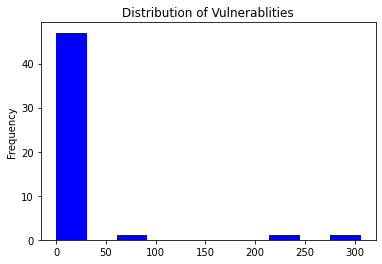

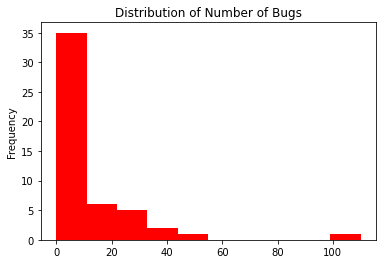

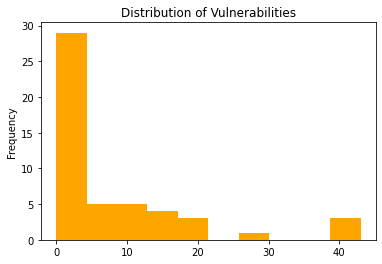

In [12]:
#show the distribution of 3 metrics
plt.hist(df.V, color ='blue')
plt.title('Distribution of Vulnerablities')
plt.ylabel('Frequency')
plt.show()
plt.hist(df.NOB, color ='r')
plt.title('Distribution of Number of Bugs')
plt.ylabel('Frequency')
plt.show()
plt.hist(df.SH, color = 'orange')
plt.title('Distribution of Vulnerabilities')
plt.ylabel('Frequency')
plt.show()


In [13]:
#Min max scaler for all data
labelv= LabelEncoder()
label =labelv.fit_transform(df['Name'])
Data = df.drop('Name',axis = 'columns')
Data['Name'] = label
x_Data = Data[['NOB', 'V', 'SH', 'CS', 'CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC',
       'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']]
y_Data =Data['Name']
x_Data = x_Data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)- x.min(axis=0)) )

# Part1 (Statistical Correlation Analysis)

In [14]:
#Show the correlation matrix of all metrics
b =x_Data.corr(method='spearman')
b.round(4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.0000,0.6947,0.5876,0.6913,0.3733,0.1334,0.4079,0.3534,0.4472,0.3499,0.3690,0.4585,0.2771,0.0627,0.5074,0.2460
V,0.6947,1.0000,0.6297,0.6242,0.2804,0.2968,0.4090,0.4262,0.3460,0.2436,0.2086,0.4686,0.2896,0.0298,0.3978,0.1108
SH,0.5876,0.6297,1.0000,0.6185,0.3847,-0.0265,0.5129,0.3919,0.4255,0.1292,0.2041,0.2787,0.1561,-0.0161,0.3494,0.1077
CS,0.6913,0.6242,0.6185,1.0000,0.5481,0.1946,0.4029,0.5774,0.4929,0.4405,0.2606,0.4569,0.3885,0.0655,0.5699,0.2188
CDR,0.3733,0.2804,0.3847,0.5481,1.0000,0.0134,0.1927,0.2120,0.2410,0.3285,0.1718,0.2437,0.2372,-0.0387,0.3436,0.1233
TD,0.1334,0.2968,-0.0265,0.1946,0.0134,1.0000,-0.1797,0.0137,-0.1264,-0.0311,0.1143,0.2391,0.2401,0.0172,0.1276,0.3520
NOC,0.4079,0.4090,0.5129,0.4029,0.1927,-0.1797,1.0000,0.6673,0.5841,-0.1202,0.2973,0.2683,-0.0744,-0.0135,0.1735,-0.1638
CBO,0.3534,0.4262,0.3919,0.5774,0.2120,0.0137,0.6673,1.0000,0.4212,0.1770,0.2504,0.5946,0.2410,0.1097,0.4926,0.0001
RFC,0.4472,0.3460,0.4255,0.4929,0.2410,-0.1264,0.5841,0.4212,1.0000,0.1346,0.3816,0.4149,0.0726,0.4441,0.5294,0.2374
LOC,0.3499,0.2436,0.1292,0.4405,0.3285,-0.0311,-0.1202,0.1770,0.1346,1.0000,0.1267,0.5543,0.6187,-0.0655,0.6782,0.1811


In [21]:
#P values of Spearman Correlation Table
b =stats.spearmanr(x_Data)
b[1]

array([[0.00000000e+00, 2.18327283e-08, 7.25068293e-06, 2.73686626e-08,
        7.59028233e-03, 3.55778386e-01, 3.28147533e-03, 1.18306573e-02,
        1.13074215e-03, 1.27474197e-02, 8.35877323e-03, 8.12622838e-04,
        5.13886369e-02, 6.65084859e-01, 1.69231351e-04, 8.51073958e-02],
       [2.18327283e-08, 0.00000000e+00, 9.64380315e-07, 1.27485409e-06,
        4.86054466e-02, 3.63748334e-02, 3.18684954e-03, 2.02677185e-03,
        1.38492191e-02, 8.81958549e-02, 1.46024167e-01, 5.99374020e-04,
        4.13686431e-02, 8.37422412e-01, 4.22857387e-03, 4.43801192e-01],
       [7.25068293e-06, 9.64380315e-07, 0.00000000e+00, 1.69442897e-06,
        5.81320990e-03, 8.54805640e-01, 1.39950923e-04, 4.88526780e-03,
        2.06656836e-03, 3.71294407e-01, 1.55173054e-01, 4.99897425e-02,
        2.78954677e-01, 9.11549686e-01, 1.28887263e-02, 4.56647540e-01],
       [2.73686626e-08, 1.27485409e-06, 1.69442897e-06, 0.00000000e+00,
        3.78281036e-05, 1.75642587e-01, 3.72437837e-03, 1.131

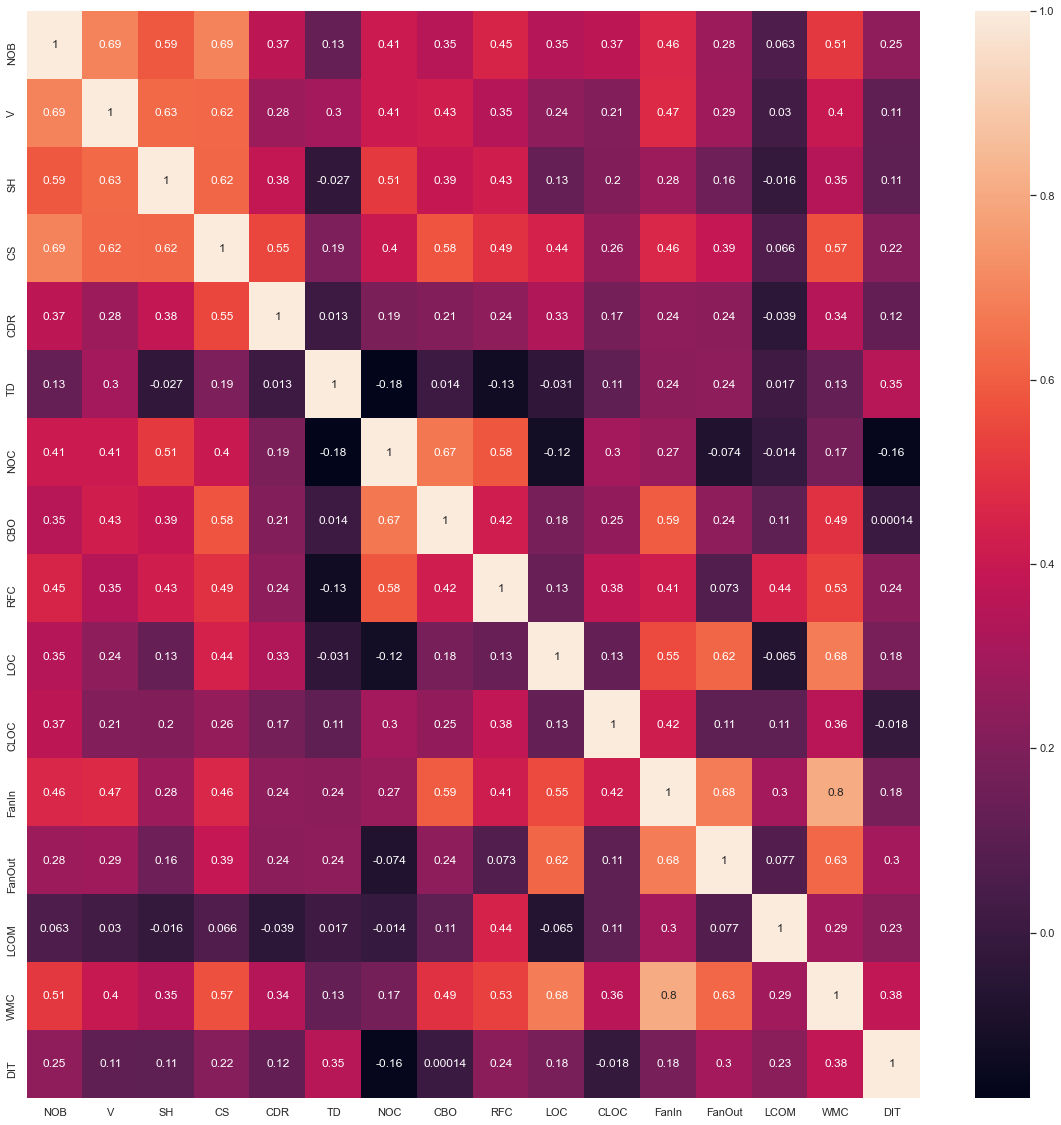

In [16]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(20,20))
ax = sns.heatmap(b, annot=True)

In [17]:
#Correlation between External Metrics & TD
data = x_Data[['NOB','V','SH','CS','CDR','TD']]
correlation = data.corr(method='spearman')
correlation

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [18]:
#Correlation between Internal Metrics & TD
data = x_Data[['NOC', 'CBO','RFC','LOC','CLOC','FanIn','FanOut','LCOM','WMC','DIT','CDR','TD']]
correlation = data.corr(method='spearman')
correlation.round(4)

,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT,CDR,TD
NOC,1.0000,0.6673,0.5841,-0.1202,0.2973,0.2683,-0.0744,-0.0135,0.1735,-0.1638,0.1927,-0.1797
CBO,0.6673,1.0000,0.4212,0.1770,0.2504,0.5946,0.2410,0.1097,0.4926,0.0001,0.2120,0.0137
RFC,0.5841,0.4212,1.0000,0.1346,0.3816,0.4149,0.0726,0.4441,0.5294,0.2374,0.2410,-0.1264
LOC,-0.1202,0.1770,0.1346,1.0000,0.1267,0.5543,0.6187,-0.0655,0.6782,0.1811,0.3285,-0.0311
CLOC,0.2973,0.2504,0.3816,0.1267,1.0000,0.4168,0.1096,0.1076,0.3551,-0.0179,0.1718,0.1143
FanIn,0.2683,0.5946,0.4149,0.5543,0.4168,1.0000,0.6793,0.2964,0.8029,0.1794,0.2437,0.2391
FanOut,-0.0744,0.2410,0.0726,0.6187,0.1096,0.6793,1.0000,0.0770,0.6263,0.2954,0.2372,0.2401
LCOM,-0.0135,0.1097,0.4441,-0.0655,0.1076,0.2964,0.0770,1.0000,0.2913,0.2293,-0.0387,0.0172
WMC,0.1735,0.4926,0.5294,0.6782,0.3551,0.8029,0.6263,0.2913,1.0000,0.3810,0.3436,0.1276
DIT,-0.1638,0.0001,0.2374,0.1811,-0.0179,0.1794,0.2954,0.2293,0.3810,1.0000,0.1233,0.3520


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):
  #Plot the Scatter Graph to see results better



#Linear Regressor is one of the best choice for the data that is correlated linearly:

 def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all



#SVR is also one of the most common regressor that used for regression predictions
 def svrRegression(X_train,y_train,X_test,y_test):
  



 def decisionTreeRegression(X_train,y_train,X_test,y_test):
  



 def randomDecTreeRegression(X_train,y_train,X_test,y_test):
  



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
 def mlpRegressor(X_train,y_train,X_test,y_test):



In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [18]:
#split data into train and test data

In [1]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

In [2]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )

In [3]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [4]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [5]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [24]:
#split data into train and test data

In [6]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

In [7]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )

In [8]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [9]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [10]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [30]:
#split data into train and test data

In [11]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

In [12]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )

In [13]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [14]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

In [15]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )